### Homework 2
Cameron Ruddy - cruddy@research.stevens.edu

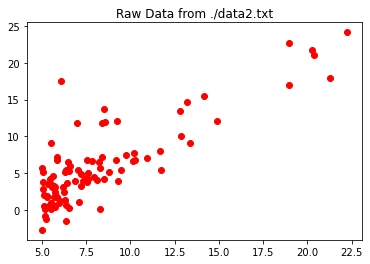

In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt

FILENAME = "./data2.txt"

### Import data from txt file ###
try:
    with open(FILENAME) as f:
        raw_data = [line.rstrip().split(",") for line in f]
except FileNotFoundError:
    print("No file named {}".format(FILENAME))
    sys.exit(0)

# Enter into x and y arrays, convert from str to float #
x_data = np.array([float(data_pair[0]) for data_pair in raw_data])
y_data = np.array([float(data_pair[1]) for data_pair in raw_data])

plt.figure(0)
plt.scatter(x_data[:], y_data[:], color="red")
plt.title("Raw Data from {}".format(FILENAME))
plt.show()

First, the file contatining initial sample data is opened and read in line-by-line using the [`rstrip()`](https://www.w3schools.com/python/ref_string_rstrip.asp) method. Each line is further split into seperate values using the [`split()`](https://www.w3schools.com/python/ref_string_split.asp) method. This effectively makes a list of 2-entry lists. 

Next, data must be seperated into X and Y data. This is done by iterating over the lists in `raw_data` and copying the first value of each list into the `x_data` array and the second value into the `y_data` array. Each entry must also be cast to float, as each entry is initially considered a string when read in from the file.

[-3.89578088  1.19303364]


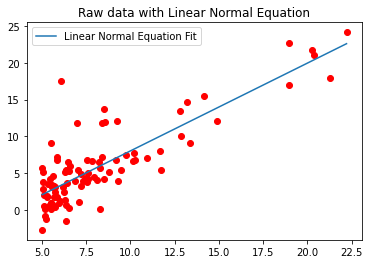

In [3]:
### Implement Normal Equation ###
# This is taken from the book

X_b = np.c_[np.ones((len(x_data),1)), x_data]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_data)
print(theta_best)

# Add to plot
x_vec = np.linspace(min(x_data), max(x_data))

# theta_best has to be reversed, since poly1d needs
# the coefficients in reverse order for some reason
trend = np.poly1d(theta_best[::-1])

plt.scatter(x_data[:], y_data[:], color="red")
plt.plot(x_vec, 
        trend(x_vec),
        label="Linear Normal Equation Fit")
plt.legend()
plt.title("Raw data with Linear Normal Equation")
plt.show()


In [9]:
### Batch Gradient Descent ###
# This is also taken from the book
eta = 0.1           # Learning rate
n_iterations = 10
m = len(y_data)

theta = np.random.randn(2,1)    # Random initializaiton

for iteration in range(n_iterations):
    #gradients = 2/m * np.dot(X_b.T, (y_data - np.dot(X_b, theta)))
    #theta = theta - eta * gradients
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_data)
    theta = theta - (eta * gradients)

print(theta)

[[-4.18244125e+11 -1.97576051e+11 -3.15757003e+11 -2.68607711e+11
  -1.37416371e+11 -2.69442212e+11 -7.28729538e+10 -2.72415121e+11
  -1.31559219e+11 -5.90072024e+10 -4.42886955e+10 -3.63819030e+11
  -4.17565073e+10 -1.47912825e+11  2.18460099e+10 -5.10872688e+10
  -9.78167026e+10  2.58988149e+10 -5.47095236e+10 -1.00020306e+11
  -4.13262179e+10 -5.27120394e+11 -7.06484877e+10 -9.47577358e+10
  -3.98632338e+10 -5.49834461e+11 -3.11558421e+11 -1.43242229e+11
  -3.42617496e+11 -5.89186387e+11  7.23379989e+10 -1.15857565e+11
  -2.75909592e+11 -7.70887702e+09 -1.30096234e+11 -7.84536775e+10
  -6.68254312e+10 -4.79552832e+10 -2.23309967e+11 -1.02839354e+11
   2.60083432e+10 -6.14820186e+10 -9.99186013e+10 -2.31236704e+10
  -1.35030220e+11  1.32370916e+10 -9.33547314e+10 -7.56544720e+09
  -1.68214664e+11  1.39777110e+10 -1.35515274e+11 -7.45070335e+09
  -7.13134805e+10 -8.98185345e+10  3.40562976e+09  7.75823146e+10
  -2.40364056e+10 -7.95463519e+10 -6.28093964e+10 -1.00667044e+11
  -9.42857

In [5]:
### Stochastic Gradient Descent ###
n_epochs = 1
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y_data[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
print(theta)

[[5.76299083e+65]
 [1.00359959e+67]]
